In [37]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay, confusion_matrix


In [24]:
# Extract data
X = np.load('Xtrain_Classification_Part1.npy')
y = np.load('Ytrain_Classification_Part1.npy')

X_train, X_test, y_train, y_test = train_test_split(X,y)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [25]:
# Reshape to 50x50 pixel images
pixels = 50
train_images = []
test_images = []

for image in X_train:
    train_images.append(image.reshape(pixels, pixels))

for image in X_test:
    test_images.append(image.reshape(pixels, pixels))

train_images = np.array(train_images)
test_images = np.array(test_images)

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images.shape

(4852, 50, 50)

In [26]:
for i in range(len(y_train)):
    y_train[i] = int(y_train[i])
    
for i in range(len(y_test)):
    y_test[i] = int(y_test[i])

In [27]:
clf = SVC(kernel='linear')
clf = clf.fit(X_train,y_train)

In [31]:
# Predict the test set
predictions = clf.predict(X_test)
bacc = balanced_accuracy_score(y_test, predictions)
print(f"BACC = {bacc * 100}")

BACC = 83.91765906557973


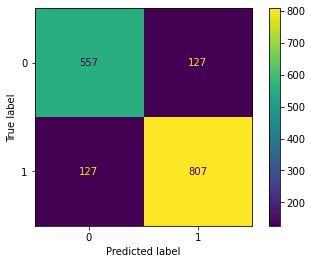

In [33]:

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


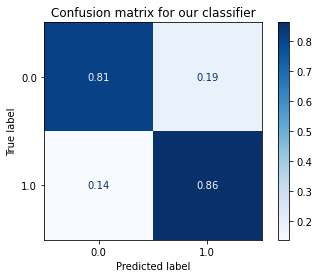

In [34]:
# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

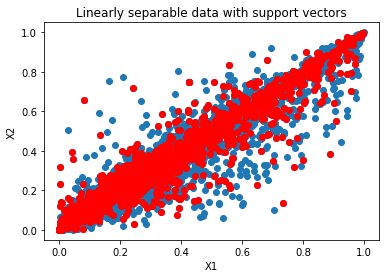

In [35]:
# Get support vectors
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()